#**Heart Disease Dataset**

In [1]:
import math, time, random, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/heart.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# Check the dataset

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Data Preparation**

## Missing Value

Mencari missing value dan mengatasi masalah missing value jika ada.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Berdasarkan informasi tersebut, diketahui bahwa dataset terdiri dari 1025 baris dan 14 kolom. Kecuali kolom 'oldpeak' dengan tipe data float64, semua kolom memiliki tipe data int64. Berdasarkan info tersebut juga diketahui bahwa tidak ditemukan adanya missing values karena semua data pada kolom berjumlah 1025, sesuai dengan jumlah barisnya.

In [5]:
# Meamstikan kembali bahwa tidak ada missing value

missing_value_count = df.isnull().sum()
total_missing_value = missing_value_count.sum()

print('\nTotal missing value: ', total_missing_value)


Total missing value:  0


## Duplicate value

Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.

In [6]:
# Duplicate values

total_duplicate = df.duplicated().sum()
print('Total duplicate value:', total_duplicate, 'rows')

Total duplicate value: 723 rows


In [7]:
# Find out duplicate data

df.sort_values(by='age', ascending=False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


Jika difilter ascending (seperti df.head() ), data duplikat tidak terlihat.

In [8]:
# Handling duplicate value

# Drop the duplicate values
df.drop_duplicates(inplace=True)

# Check if the duplicate values have been deleted
count_duplicate = df.duplicated().sum()
print('Total duplicate value:', count_duplicate, 'rows')

Total duplicate value: 0 rows


In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Outlier
Memeriksa outlier dan menangani outlier jika ada.

<Axes: >

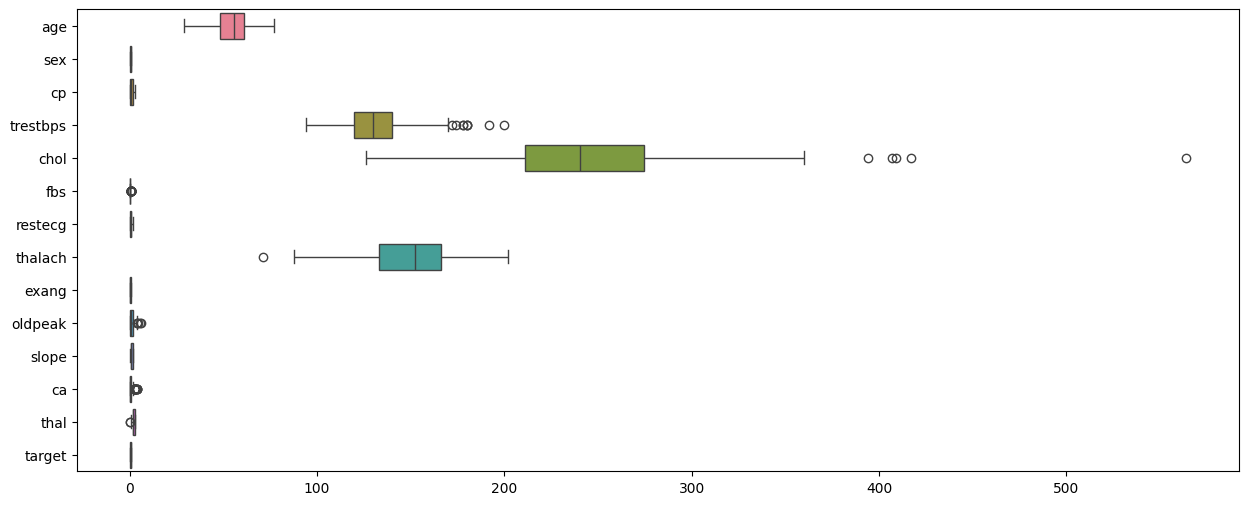

In [10]:
# Check outliers menggunakan boxplot

plt.figure(figsize=(15,6))
sns.boxplot(data=df, orient = 'h')

Berdasarkan gambar boxplot di atas, maka diketahui bahwa terdapat outlier di beberapa kolom, yaitu trestbps, chol, thalach, oldpeak, ca, dan thal.

Lowerbound (q1): 90.0
Upperbound (q3): 170.0
Outlier data in dataset: 290 rows. 



<Axes: ylabel='trestbps'>

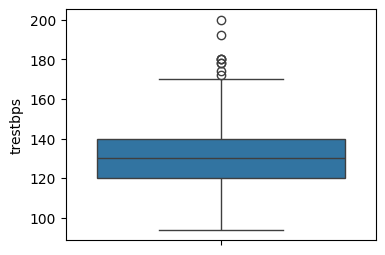

In [11]:
# Check trestbps outliers

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn, [25,75])
    IQR = q3-q1
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range, upper_range

lowerbound,upperbound = outlier_treatment(df.trestbps)
print('Lowerbound (q1): {0}\nUpperbound (q3): {1}'.format(lowerbound, upperbound))
print('Outlier data in dataset: {} rows. \n'.format(len(df[(df.trestbps < lowerbound) | (df.chol > upperbound)])))

df[(df.trestbps < lowerbound) | (df.trestbps > upperbound)]


plt.figure(figsize=(4,3))
sns.boxplot(df['trestbps'])

Jumlah outliers dari kolom trestbps terlalu banyak, yaitu 290 rows dari total 302 rows, sehingga outliers pada kolom ini tidak dihilangkan.

Lowerbound (q1): 115.375
Upperbound (q3): 370.375
Outlier data in dataset: 5 rows. 



<Axes: ylabel='chol'>

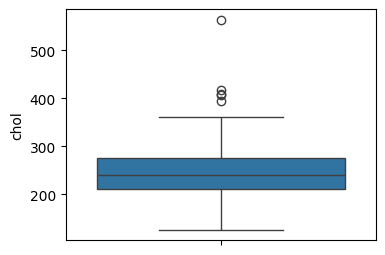

In [12]:
# Check chol outliers

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn, [25,75])
    IQR = q3-q1
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range, upper_range

lowerbound,upperbound = outlier_treatment(df.chol)
print('Lowerbound (q1): {0}\nUpperbound (q3): {1}'.format(lowerbound, upperbound))
print('Outlier data in dataset: {} rows. \n'.format(len(df[(df.chol < lowerbound) | (df.chol > upperbound)])))

df[(df.chol < lowerbound) | (df.chol > upperbound)]

# boxplot chol
plt.figure(figsize=(4,3))
sns.boxplot(df['chol'])

Karena jumlah outliers pada kolom chol tidak banyak, maka outliers ini dapat dihilangkan.

In [13]:
# Handling chol outliers

df.drop(df[(df.chol < lowerbound) | (df.chol > upperbound)].index, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='chol'>

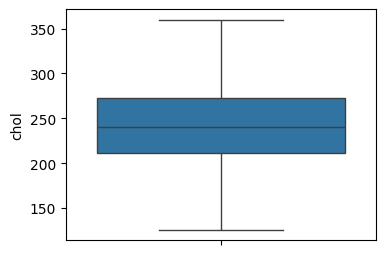

In [14]:
# boxplot chol after being fixed

plt.figure(figsize=(4,3))
sns.boxplot(df['chol'])

Lowerbound (q1): 83.5
Upperbound (q3): 215.5
Outlier data in dataset: 1 rows. 



<Axes: ylabel='thalach'>

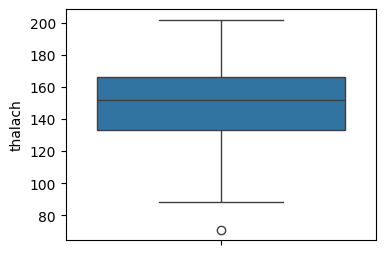

In [15]:
# Check thalach outliers

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn, [25,75])
    IQR = q3-q1
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range, upper_range

lowerbound,upperbound = outlier_treatment(df.thalach)
print('Lowerbound (q1): {0}\nUpperbound (q3): {1}'.format(lowerbound, upperbound))
print('Outlier data in dataset: {} rows. \n'.format(len(df[(df.thalach < lowerbound) | (df.thalach > upperbound)])))

df[(df.thalach < lowerbound) | (df.thalach > upperbound)]

# boxplot chol
plt.figure(figsize=(4,3))
sns.boxplot(df['thalach'])

In [16]:
# Handling thalach outliers

df.drop(df[(df.thalach < lowerbound) | (df.thalach > upperbound)].index, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<Axes: ylabel='thalach'>

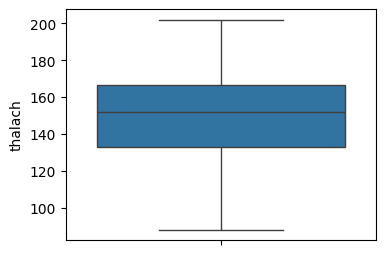

In [17]:
# boxplot thalach after being fixed

plt.figure(figsize=(4,3))
sns.boxplot(df['thalach'])

Lowerbound (q1): -2.4000000000000004
Upperbound (q3): 4.0
Outlier data in dataset: 5 rows. 



<Axes: ylabel='oldpeak'>

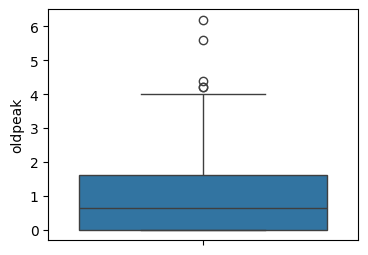

In [18]:
# Check oldpeak outliers

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn, [25,75])
    IQR = q3-q1
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range, upper_range

lowerbound,upperbound = outlier_treatment(df.oldpeak)
print('Lowerbound (q1): {0}\nUpperbound (q3): {1}'.format(lowerbound, upperbound))
print('Outlier data in dataset: {} rows. \n'.format(len(df[(df.oldpeak < lowerbound) | (df.oldpeak > upperbound)])))

df[(df.oldpeak < lowerbound) | (df.oldpeak > upperbound)]

# boxplot oldpeak
plt.figure(figsize=(4,3))
sns.boxplot(df['oldpeak'])

In [19]:
# Handling oldpeak outliers

df.drop(df[(df.oldpeak < lowerbound) | (df.oldpeak > upperbound)].index, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Lowerbound (q1): -1.5
Upperbound (q3): 2.5
Outlier data in dataset: 20 rows. 



<Axes: ylabel='ca'>

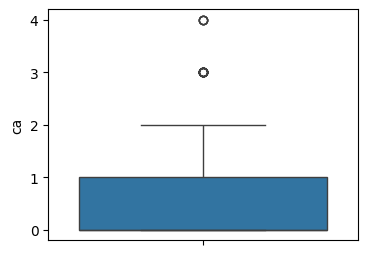

In [20]:
# Check ca outliers

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn, [25,75])
    IQR = q3-q1
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range, upper_range

lowerbound,upperbound = outlier_treatment(df.ca)
print('Lowerbound (q1): {0}\nUpperbound (q3): {1}'.format(lowerbound, upperbound))
print('Outlier data in dataset: {} rows. \n'.format(len(df[(df.ca < lowerbound) | (df.ca > upperbound)])))

df[(df.ca < lowerbound) | (df.ca > upperbound)]

# boxplot ca
plt.figure(figsize=(4,3))
sns.boxplot(df['ca'])

In [21]:
# Handling ca outliers

df.drop(df[(df.ca < lowerbound) | (df.ca > upperbound)].index, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Lowerbound (q1): 0.5
Upperbound (q3): 4.5
Outlier data in dataset: 2 rows. 



<Axes: ylabel='thal'>

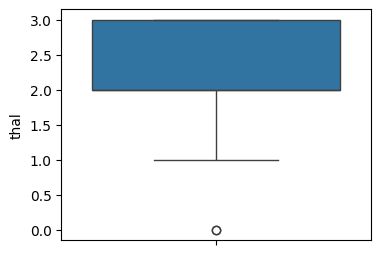

In [22]:
# Check thal outliers

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn, [25,75])
    IQR = q3-q1
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range, upper_range

lowerbound,upperbound = outlier_treatment(df.thal)
print('Lowerbound (q1): {0}\nUpperbound (q3): {1}'.format(lowerbound, upperbound))
print('Outlier data in dataset: {} rows. \n'.format(len(df[(df.thal < lowerbound) | (df.thal > upperbound)])))

df[(df.thal < lowerbound) | (df.thal > upperbound)]

# boxplot thal
plt.figure(figsize=(4,3))
sns.boxplot(df['thal'])

In [23]:
# Handling thal outliers

df.drop(df[(df.thal < lowerbound) | (df.thal> upperbound)].index, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Imbalance data
Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.

In [46]:
# Check imbalance data variabel target
df['target'].value_counts()

1    153
0    116
Name: target, dtype: int64

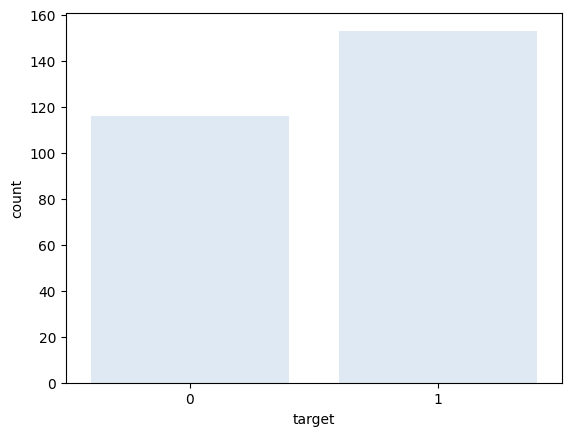

In [24]:
# visualisasi
sns.set_palette("Blues")
sns.countplot(data=df, x='target')
plt.show()

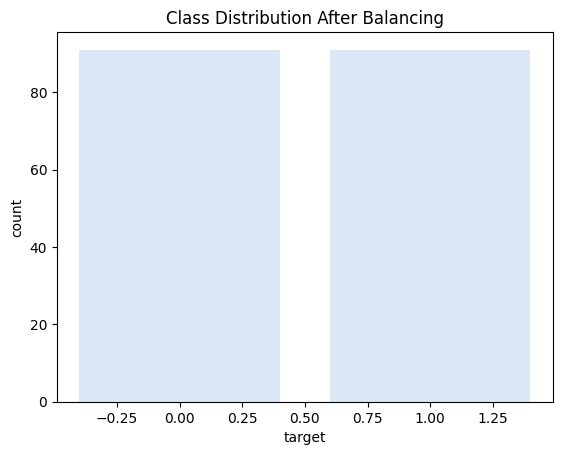

In [25]:
# Handling imbalance data

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

def balance_classes(df, target, technique):

  x = df.drop(target, axis=1)
  y = df['target']

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  sampler = RandomUnderSampler(random_state=42)
  x_resampled, y_resampled = sampler.fit_resample(x_train, y_train)

  return x_resampled, y_resampled

# Example usage
balanced_x, balanced_y = balance_classes(df.copy(), 'target', technique='RandomUnderSampler')

def visualize_class_distribution(y,title):
  plt.bar(Counter(y).keys(), Counter(y).values())
  plt.title(title)
  plt.xlabel('target')
  plt.ylabel('count')
  plt.show()

visualize_class_distribution(balanced_y, 'Class Distribution After Balancing')



## Feature encoding

Melakukan feature encoding jika diperlukan.

In [26]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


Semua data sudah berbentuk numerik sehingga label encoding tidak diperlukan.

One-Hot Encoding tidak diperlukan untuk ordinal variabel.

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Siapkan encoder
encoder = OneHotEncoder(sparse_output=False, drop="first")

# Apply encoder
encoded = encoder.fit_transform(df[["sex","cp", "restecg", "exang", "thal"]])
feature_names = encoder.get_feature_names_out(["sex","cp", "restecg", "exang", "thal"])
df_one_hot = pd.DataFrame(encoded, columns=feature_names)

df_one_hot

,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,exang_1,thal_2,thal_3
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
264,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
265,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
266,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
267,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#**Exploratory Data Analysis (EDA)**

## Mengelaborasi features dan tipe data (nominal, ordinal, numerical)


<function matplotlib.pyplot.show(close=None, block=None)>

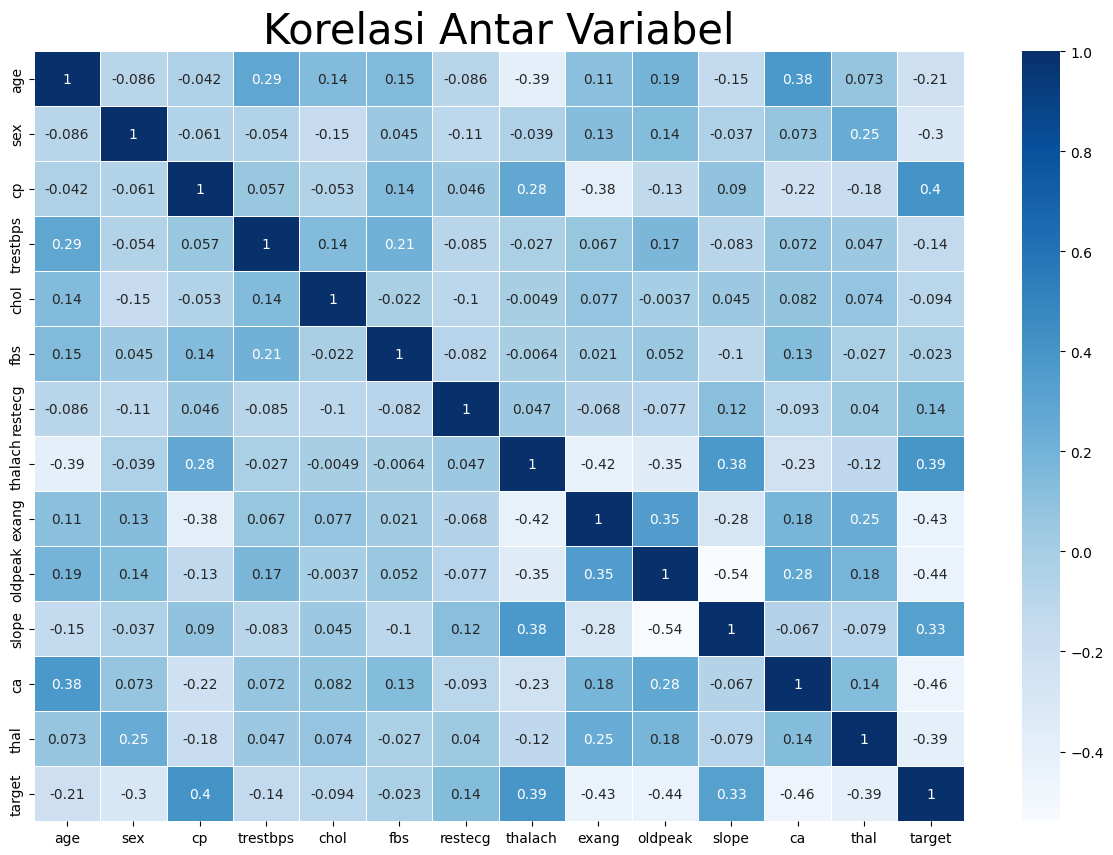

In [28]:
#heatmap correlation

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths = .5, cmap='Blues')
plt.title("Korelasi Antar Variabel", fontsize = 30)
plt.show

Jika dilihat berdasarkan heatmap, kolom cp dan thalach memiliki korelasi yang cukup kuat dengan target dibandingkan dengan kolom yang lain. Hal ini mengindikasikan bahwa orang yang memiliki penyakit jantung cenderung memiliki rasa nyeri pada dada dan nilai maximum detak jantung yang cukup tinggi. selain itu, thalach dengan slope dan ca dengan age juga memiliki korelasi positif yang cukup kuat.

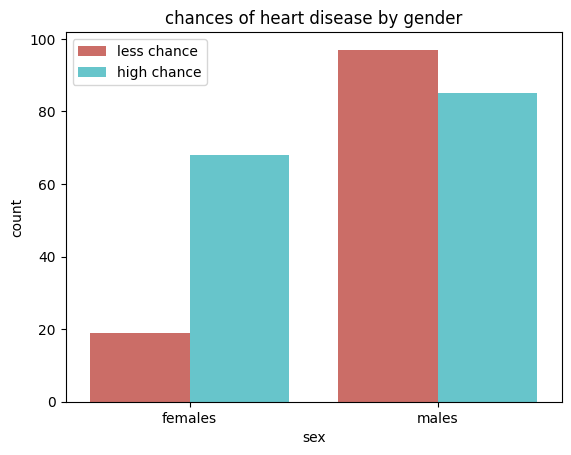

In [29]:
# Chances of heart disease by gender

sns.countplot(x='sex', data =df, hue='target', palette = 'hls')
plt.title('chances of heart disease by gender')
plt.xticks([0,1], ['females', 'males'])
plt.legend(labels=['less chance', 'high chance'])

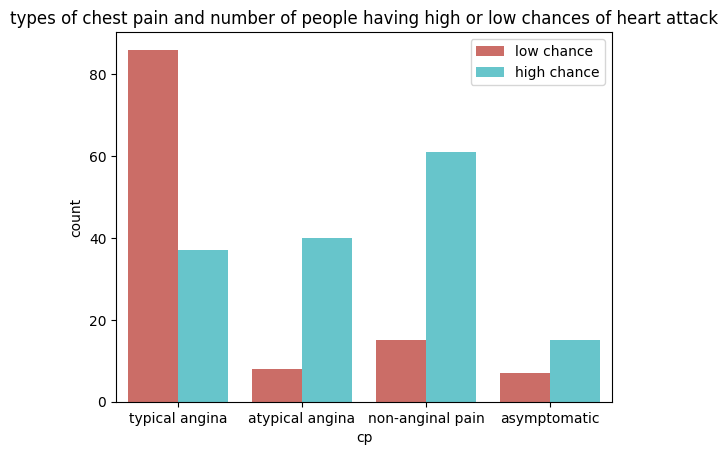

In [32]:
# Relation between types of chest pain and number of people having high or low chances of heart attack

sns.countplot(x='cp', hue='target', data=df, palette = 'hls')
plt.title('types of chest pain and number of people having high or low chances of heart attack')
plt.xticks([0,1,2,3], ["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.legend(labels=['low chance', 'high chance'])

## Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus


*   Mean: Digunakan ketika distribusi data relatif simetris dan tidak ada outlier yang signifikan.

*   Median: Digunakan ketika distribusi data tidak simetris atau ketika ada outlier yang signifikan dalam dataset.

*   Modus: Digunakan ketika kita tertarik untuk mengetahui nilai yang paling umum atau dominan dalam dataset, terutama untuk data kategorikal.









In [67]:
# Kolom seperti jenis kelamin bersifat kategorikal, sehingga lebih cocok menggunakan modus
# kode --> 0= Female; 1= male

modus_sex = df['sex'].mode().iloc[0]
print("Modus kolom sex adalah:", modus_sex)

Modus kolom sex adalah: 1


In [68]:
# Median digunakan untuk variabel yang memiliki distribusi tidak normal atau terdapat outlier yang signifikan

median_chol = df['chol'].median()
print('Median kolom chol adalah: ', median_chol)

Median kolom chol adalah:  240.0


In [69]:
# Contoh  mean pada kolom 'age' yang tidak memiliki outliers
mean_age = df['age'].mean()
print("Mean kolom age adalah:", mean_age)

Mean kolom age adalah: 53.940520446096656


## Menemukan dan mendeskripsikan statistical five summaries

In [33]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,53.940520,0.676580,0.988848,131.040892,242.903346,0.137546,0.539033,151.033457,0.327138,0.966171,1.427509,0.513011,2.308550,0.568773
std,9.009748,0.468653,1.034780,17.712310,44.614078,0.345065,0.521336,22.540238,0.470042,1.056328,0.610347,0.725867,0.577534,0.496171
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,155.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


Contoh deskripsi dari statistical five summaries:

*   age: Pasien paling muda berusia 29 tahun (min), sementara yang paling tua berusia 76 tahun (max). Rata-rata (mean) umur pasien adalah 54 tahun dari rentang umur 29-76 tahun tersebut. Nilai Q1 (25%) menunjukkan bahwa terdapat 25% pasien yang berumur di bawah 47 tahun, sementara Q2 (50%/median) menunjukkan bahwa 50% pasien berusia 55 tahun atau lebih muda, dan 50% lainnya berusia 55 tahun atau lebih tua. Adapun Q3 (75%) menunjukkan bahwa terdapat 75% pasien yang berumur di bawah 60 tahun. IQR (Q3-Q1) dari data tersebut terkonsentrasi dalam rentang 13 tahun.


## Mendeskripsikan distribusi data

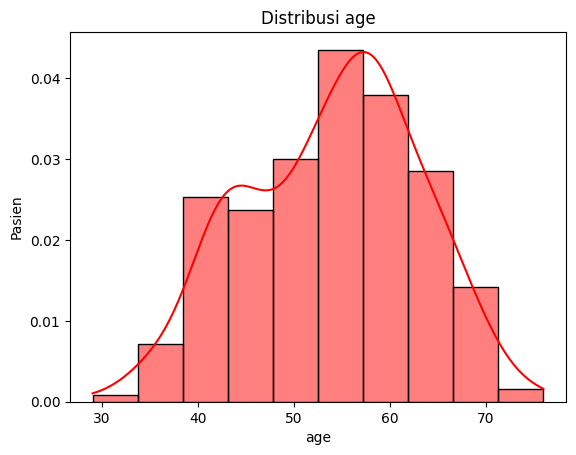

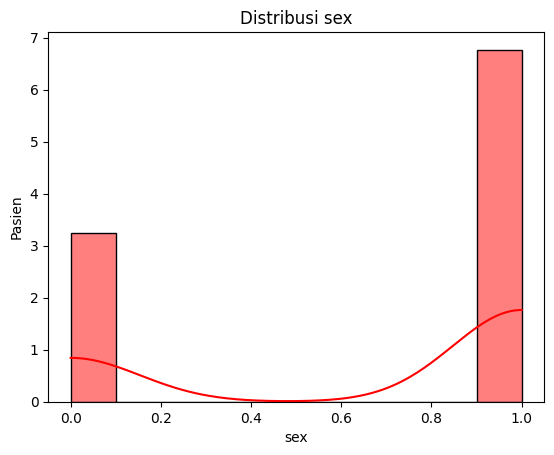

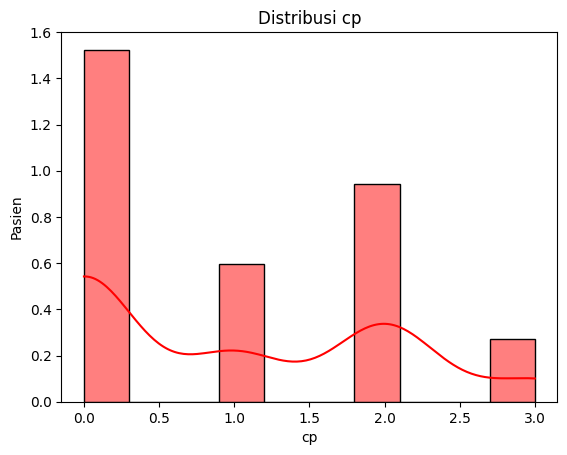

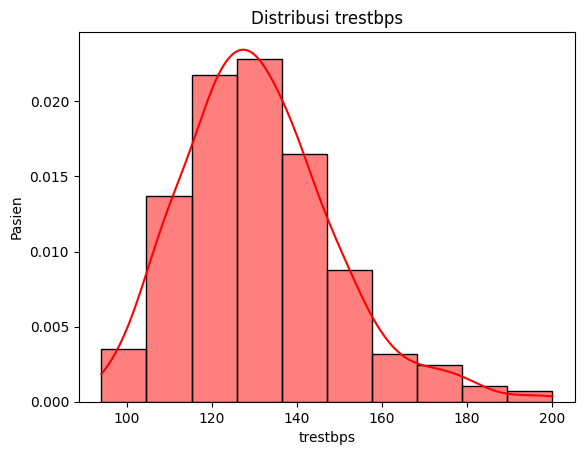

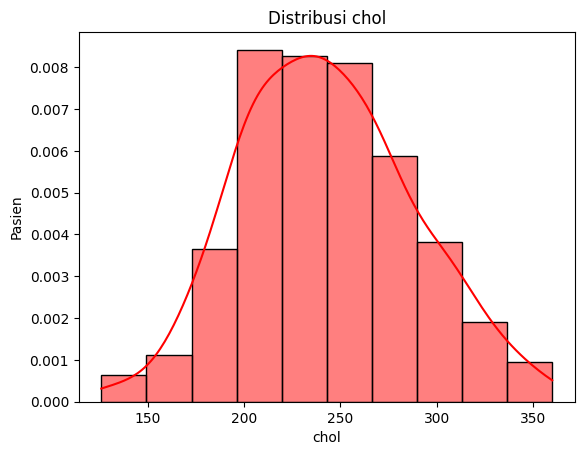

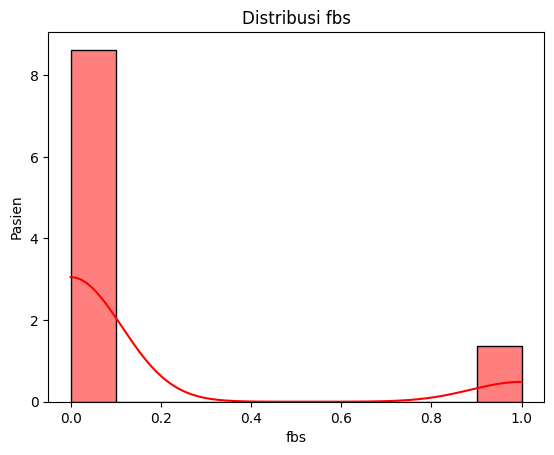

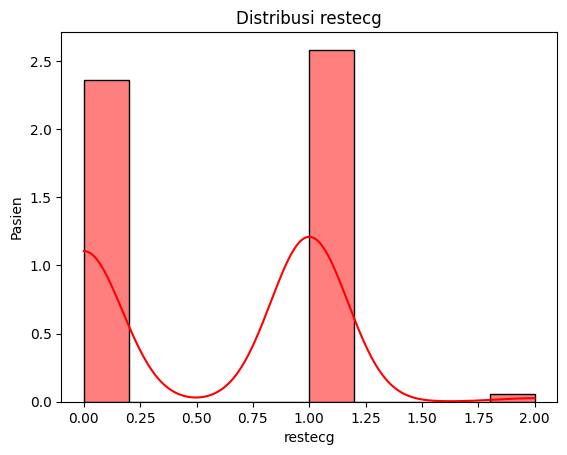

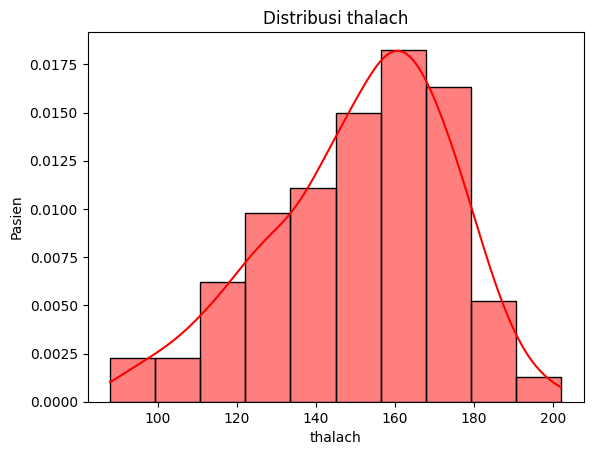

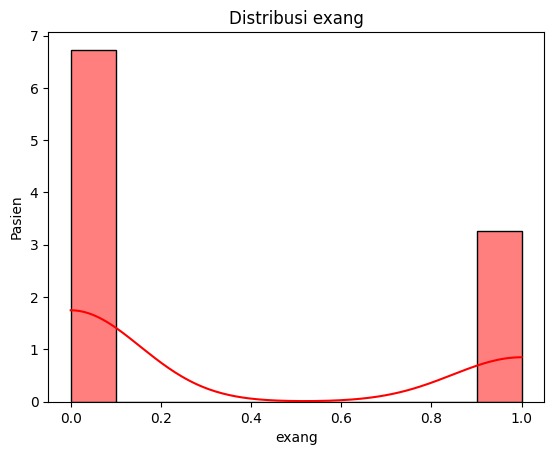

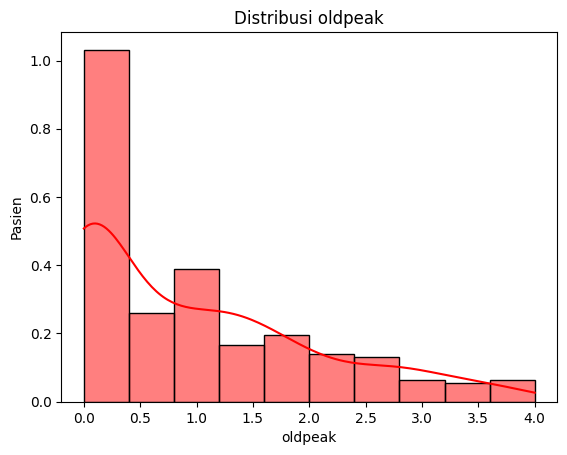

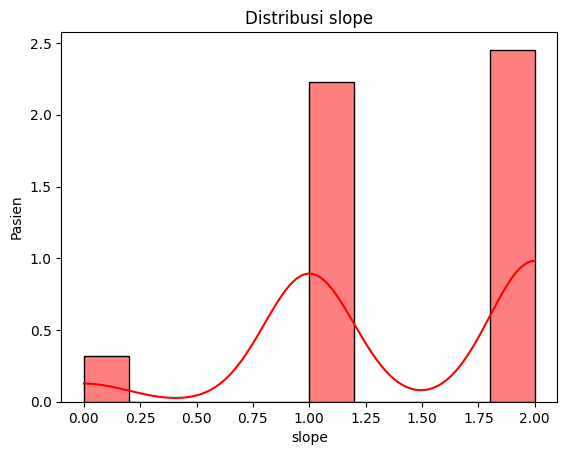

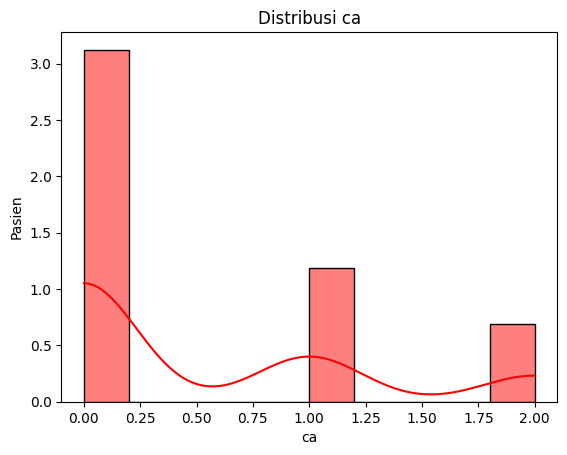

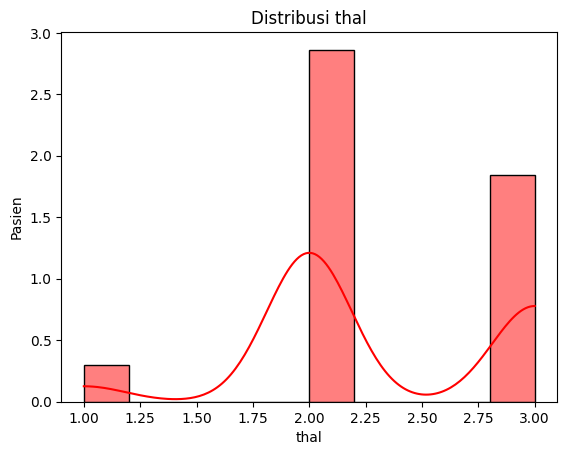

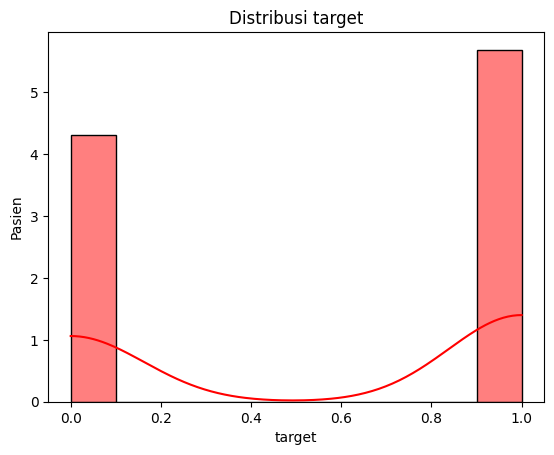

In [75]:
# Distribution data visualization

for column in df.columns:
    sns.histplot(df[column], bins = 10, kde=True, stat='density', color='red')
    plt.xlabel(column)
    plt.ylabel('Pasien')
    plt.title(f'Distribusi {column}')
    plt.show()

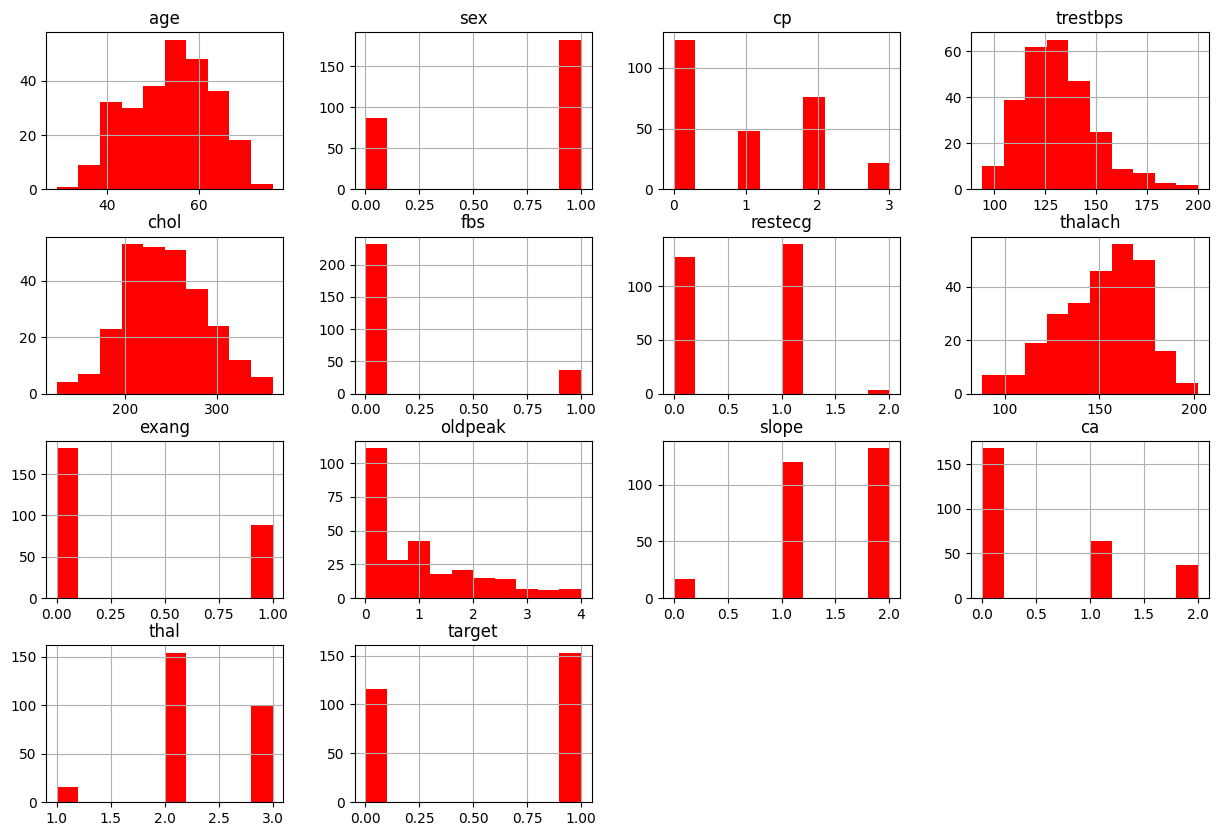

In [73]:
df.hist(figsize=(15,10), bins=10, color='red')
plt.show()

Dilihat dari chart histogram dan density plot di atas, beberapa fitur yang terlihat hampir memiliki distribusi normal adalah tekanan darah istirahat (trestbps), Kadar kolesterol serum (chol), dan Denyut nadi maksimal tercapai (thalach).

In [76]:
#Rincian skewness
skew = df.skew().sort_values(ascending=False)
skew

fbs         2.116518
ca          1.045503
oldpeak     0.974652
trestbps    0.750193
exang       0.741028
cp          0.470251
chol        0.202330
restecg     0.081699
thal       -0.149215
age        -0.196104
target     -0.279293
thalach    -0.527988
slope      -0.563159
sex        -0.759208
dtype: float64

Berdasarkan rincian skewness, diketahui bahwa age memiliki distribusi nomal yang sedikit miring ke kiri (negative skewness), trestbps memiliki distribusi yang miring ke kanan (positive skewness), chol memiliki distribusi yang miring ke kanan (positive skewness), thalach memiliki distribusi yang miring ke kiri (negative skewness), oldpeak memiliki distribusi yang miring ke kanan (positive skewness).

#**Feature Engineering**

Membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membuat langkah preventif untuk mengurangi dampak dari heart disease tersebut.

In [77]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0




1.   Cholesterol Status:

Kolesterol tinggi dalam darah dapat menyebabkan penyumbatan arteri dan meningkatkan risiko serangan jantung. Dengan mengkategorikan kolesterol menjadi normal atau tinggi, seseorang dapat memantau kadar kolesterol mereka dan mengadopsi diet dan gaya hidup yang sehat untuk mengendalikan kolesterol



In [78]:
# Cholesterol Status (cholstat)
df['cholstat'] = pd.cut(df['chol'], bins=[0, 200, float('inf')], labels=['normal', 'high'])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholstat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,high
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,high
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,normal
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,high
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,high
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,normal
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,high
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,high


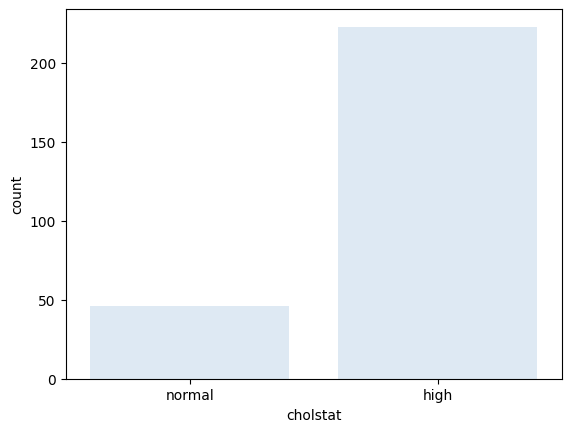

In [79]:
# visualization

sns.countplot(data=df, x='cholstat')
plt.show()

Berdasarkan hasil analisis, diketahui bahwa status kolestrol pasien lebih dominan yang 'high' dibandingkan 'normal'

2. Blood Pressure Status:

Tekanan darah tinggi adalah faktor risiko utama untuk penyakit jantung. Dengan mengkategorikan tekanan darah menjadi kategori rendah, normal, atau tinggi, seseorang dapat memantau status tekanan darah mereka dan mengambil langkah-langkah pencegahan yang sesuai.

In [80]:
# Blood Pressure Status (bps)
df['bps'] = pd.cut(df['trestbps'], bins=[0, 120, 130, float('inf')], labels=['low', 'normal', 'high'])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholstat,bps
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,high,normal
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,high,high
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,normal,high
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,high,high
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,high,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,high,low
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,normal,low
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,high,normal
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,high,high


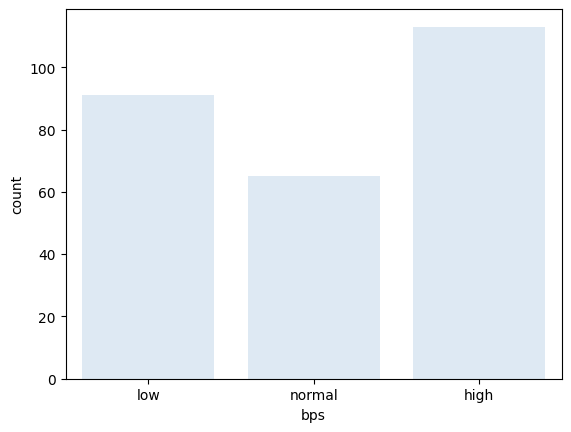

In [81]:
# visualization

sns.countplot(data=df, x='bps')
plt.show()

3. Mengklasifikasi usia untuk melihat kelompok usia mana yang paling banyak terkena heart disease, sehingga data ini dapat digunakan untuk mencegah atau mengurangi terjadinya penyakit tersebut pada kategori usia rentan.

In [82]:
def classify_age(age):
    if age >= 20 and age < 45:
        return 'Young Adult'
    elif age < 60:
        return 'Middle Adult'
    else:
        return 'Old'

df['age_class'] = df['age'].apply(classify_age)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholstat,bps,age_class
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,high,normal,Middle Adult
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,high,high,Middle Adult
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,normal,high,Old
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,high,high,Old
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,high,low,Middle Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,high,low,Old
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,normal,low,Young Adult
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,high,normal,Middle Adult
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,high,high,Middle Adult


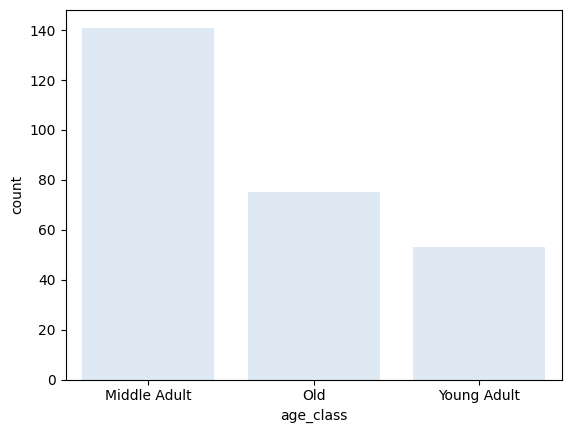

In [83]:
# Visualization
sns.countplot(data=df, x='age_class')
plt.show()

Berdasarkan data tersebut, diketahui bahwa pasien yang paling banyak berada dalam kelompok usia 'Middle Adult'. Dengan demikian, orang-orang dengan kelompok usia ini atau akan memasuki rentang usia kelompok diharapkan dapat lebih menjaga kesehatan mereka


4. Glucose Level Classification:

Glukosa darah tinggi atau diabetes dapat meningkatkan risiko penyakit jantung. Dengan mengkategorikan tingkat glukosa darah menjadi normal atau tinggi, seseorang dapat memantau risiko diabetes mereka dan mengadopsi pola makan yang sehat untuk mengendalikan glukosa darah.



In [84]:
# Glucose Level Classification (gl)
df['gl'] = df['fbs'].map({0: 'normal', 1: 'high'})

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholstat,bps,age_class,gl
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,high,normal,Middle Adult,normal
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,high,high,Middle Adult,high
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,normal,high,Old,normal
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,high,high,Old,normal
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,high,low,Middle Adult,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,high,low,Old,normal
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,normal,low,Young Adult,normal
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,high,normal,Middle Adult,normal
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,high,high,Middle Adult,normal


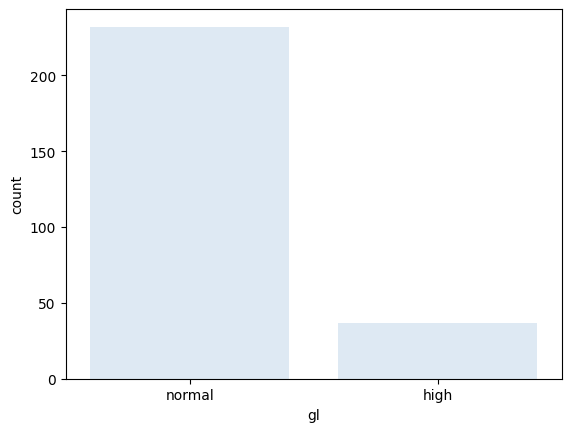

In [87]:
# Visualization
sns.countplot(data=df, x='gl')
plt.show()

5. Rasio Kolesterol Total terhadap HDL (Total Cholesterol to HDL Ratio):

Menghitung rasio kolesterol total terhadap kolesterol HDL untuk mengevaluasi risiko penyakit jantung koroner. Rasio yang tinggi menunjukkan risiko yang lebih tinggi.

In [88]:
# Total Cholesterol to HDL Ratio (tcholthr)
df['tcholthr'] = df['chol'] / df['thalach']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholstat,bps,age_class,gl,tcholthr
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,high,normal,Middle Adult,normal,1.261905
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,high,high,Middle Adult,high,1.309677
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,normal,high,Old,normal,1.392000
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,high,high,Old,normal,1.260870
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,high,low,Middle Adult,normal,2.032787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,high,low,Old,normal,1.834783
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,normal,low,Young Adult,normal,0.805714
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,high,normal,Middle Adult,normal,1.583851
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,high,high,Middle Adult,normal,2.184000


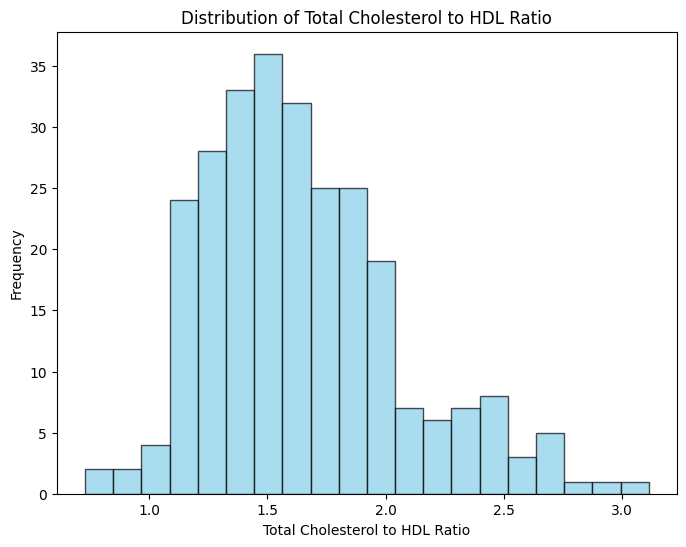

In [95]:
plt.figure(figsize=(8, 6))
plt.hist(df['tcholthr'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Cholesterol to HDL Ratio')
plt.xlabel('Total Cholesterol to HDL Ratio')
plt.ylabel('Frequency')
plt.show()

6. Rasio Tekanan Darah ke Usia (Blood Pressure to Age Ratio):

Menghitung rasio antara tekanan darah dan usia seseorang. Ini dapat membantu mengevaluasi risiko penyakit jantung dengan mempertimbangkan faktor usia.

In [96]:
# Rasio Tekanan Darah ke Usia (Blood Pressure to Age Ratio/ bpar)
df['bpar'] = df['trestbps'] / df['age']

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholstat,bps,age_class,gl,tcholthr,bpar
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,high,normal,Middle Adult,normal,1.261905,2.403846
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,high,high,Middle Adult,high,1.309677,2.641509
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,normal,high,Old,normal,1.392000,2.071429
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,high,high,Old,normal,1.260870,2.426230
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,high,low,Middle Adult,normal,2.032787,1.724138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,high,low,Old,normal,1.834783,1.764706
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,normal,low,Young Adult,normal,0.805714,2.454545
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,high,normal,Middle Adult,normal,1.583851,2.461538
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,high,high,Middle Adult,normal,2.184000,2.711864


7. Average Heart Rate During Exercise:

Rata-rata denyut jantung selama latihan adalah indikator kesehatan jantung yang penting. Memantau denyut jantung selama latihan dapat membantu seseorang mengevaluasi kebugaran kardiovaskular mereka dan membuat perubahan gaya hidup yang diperlukan untuk meningkatkan kesehatan jantung.

In [97]:
# Average Heart Rate During Exercise (ahrde)
df['ahrde'] = (df['thalach'] + (220 - df['age'])) / 2

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,cholstat,bps,age_class,gl,tcholthr,bpar,ahrde
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,0,high,normal,Middle Adult,normal,1.261905,2.403846,168.0
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,0,high,high,Middle Adult,high,1.309677,2.641509,161.0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,0,normal,high,Old,normal,1.392000,2.071429,137.5
3,61,1,0,148,203,0,1,161,0,0.0,...,1,3,0,high,high,Old,normal,1.260870,2.426230,160.0
5,58,0,0,100,248,0,0,122,0,1.0,...,0,2,1,high,low,Middle Adult,normal,2.032787,1.724138,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,0,2,1,high,low,Old,normal,1.834783,1.764706,133.5
733,44,0,2,108,141,0,1,175,0,0.6,...,0,2,1,normal,low,Young Adult,normal,0.805714,2.454545,175.5
739,52,1,0,128,255,0,1,161,1,0.0,...,1,3,0,high,normal,Middle Adult,normal,1.583851,2.461538,164.5
843,59,1,3,160,273,0,0,125,0,0.0,...,0,2,0,high,high,Middle Adult,normal,2.184000,2.711864,143.0


8. Rasio Kolesterol Terhadap Usia (Cholesterol to Age Ratio/ctar):

Feature ini memungkinkan kita untuk mengevaluasi tingkat kolesterol seseorang relatif terhadap usianya. Mengetahui rasio ini dapat membantu dalam menilai risiko seseorang terkena penyakit jantung. Pengelolaan tingkat kolesterol yang sesuai dengan usia dapat membantu dalam pencegahan penyakit jantung.

In [98]:
# Menghitung rasio kolesterol terhadap usia
df['ctar'] = df['chol'] / df['age']

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,cholstat,bps,age_class,gl,tcholthr,bpar,ahrde,ctar
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,high,normal,Middle Adult,normal,1.261905,2.403846,168.0,4.076923
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,high,high,Middle Adult,high,1.309677,2.641509,161.0,3.830189
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,normal,high,Old,normal,1.392000,2.071429,137.5,2.485714
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,high,high,Old,normal,1.260870,2.426230,160.0,3.327869
5,58,0,0,100,248,0,0,122,0,1.0,...,2,1,high,low,Middle Adult,normal,2.032787,1.724138,142.0,4.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,2,1,high,low,Old,normal,1.834783,1.764706,133.5,3.102941
733,44,0,2,108,141,0,1,175,0,0.6,...,2,1,normal,low,Young Adult,normal,0.805714,2.454545,175.5,3.204545
739,52,1,0,128,255,0,1,161,1,0.0,...,3,0,high,normal,Middle Adult,normal,1.583851,2.461538,164.5,4.903846
843,59,1,3,160,273,0,0,125,0,0.0,...,2,0,high,high,Middle Adult,normal,2.184000,2.711864,143.0,4.627119


9. Stress Level (stress_level):

Feature kategoris yang menunjukkan tingkat stres seseorang (rendah, sedang, tinggi). Stres yang tinggi dapat meningkatkan risiko penyakit jantung.

In [99]:
# Jika seseorang memiliki stres tingkat tinggi=1, jika tidak=0
df['stress_level'] = df['restecg'].apply(lambda x: 1 if x == 2 else 0)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,cholstat,bps,age_class,gl,tcholthr,bpar,ahrde,ctar,stress_level
0,52,1,0,125,212,0,1,168,0,1.0,...,0,high,normal,Middle Adult,normal,1.261905,2.403846,168.0,4.076923,0
1,53,1,0,140,203,1,0,155,1,3.1,...,0,high,high,Middle Adult,high,1.309677,2.641509,161.0,3.830189,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,normal,high,Old,normal,1.392000,2.071429,137.5,2.485714,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,high,high,Old,normal,1.260870,2.426230,160.0,3.327869,0
5,58,0,0,100,248,0,0,122,0,1.0,...,1,high,low,Middle Adult,normal,2.032787,1.724138,142.0,4.275862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,1,high,low,Old,normal,1.834783,1.764706,133.5,3.102941,0
733,44,0,2,108,141,0,1,175,0,0.6,...,1,normal,low,Young Adult,normal,0.805714,2.454545,175.5,3.204545,0
739,52,1,0,128,255,0,1,161,1,0.0,...,0,high,normal,Middle Adult,normal,1.583851,2.461538,164.5,4.903846,0
843,59,1,3,160,273,0,0,125,0,0.0,...,0,high,high,Middle Adult,normal,2.184000,2.711864,143.0,4.627119,0


10. Polanya Diet (diet_pattern):
Misalnya, jika seseorang memiliki pola diet sehat, berikan nilai 1, jika tidak, berikan nilai 0


In [100]:
df['diet_pattern'] = df['cp'].apply(lambda x: 1 if x == 1 else 0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cholstat,bps,age_class,gl,tcholthr,bpar,ahrde,ctar,stress_level,diet_pattern
0,52,1,0,125,212,0,1,168,0,1.0,...,high,normal,Middle Adult,normal,1.261905,2.403846,168.0,4.076923,0,0
1,53,1,0,140,203,1,0,155,1,3.1,...,high,high,Middle Adult,high,1.309677,2.641509,161.0,3.830189,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,normal,high,Old,normal,1.392000,2.071429,137.5,2.485714,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,high,high,Old,normal,1.260870,2.426230,160.0,3.327869,0,0
5,58,0,0,100,248,0,0,122,0,1.0,...,high,low,Middle Adult,normal,2.032787,1.724138,142.0,4.275862,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,...,high,low,Old,normal,1.834783,1.764706,133.5,3.102941,0,0
733,44,0,2,108,141,0,1,175,0,0.6,...,normal,low,Young Adult,normal,0.805714,2.454545,175.5,3.204545,0,0
739,52,1,0,128,255,0,1,161,1,0.0,...,high,normal,Middle Adult,normal,1.583851,2.461538,164.5,4.903846,0,0
843,59,1,3,160,273,0,0,125,0,0.0,...,high,high,Middle Adult,normal,2.184000,2.711864,143.0,4.627119,0,0
